## Plotting and Visualization

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows=20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10,6))
np.set_printoptions(precision=4, suppress=True)

D:\anaconda\envs\chch4934\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


## A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import numpy as np

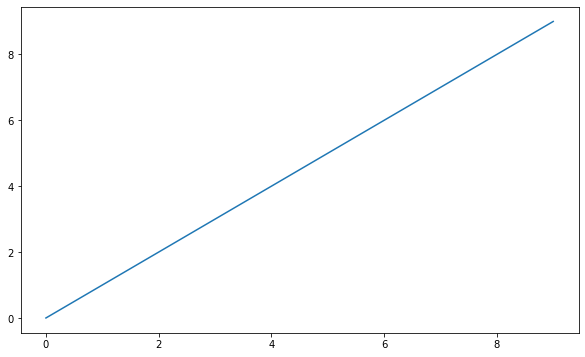

In [3]:
data = np.arange(10)
data
plt.plot(data)

### Figure and Subplots

In [4]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2,2,1)

In [6]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

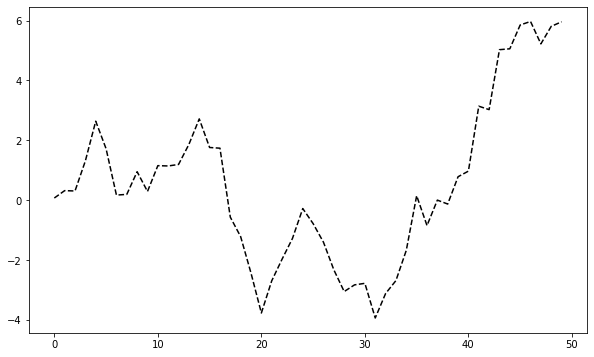

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [9]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

In [11]:
plt.close('all')

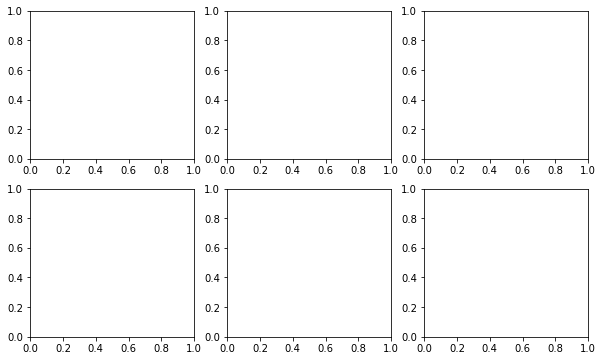

In [12]:
fig, axes = plt.subplots(2,3)

### Adjusting the spacing sround subplots

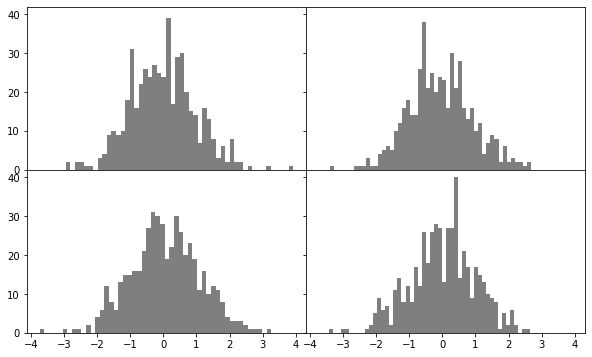

In [14]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k',alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [15]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [16]:
from numpy.random import randn

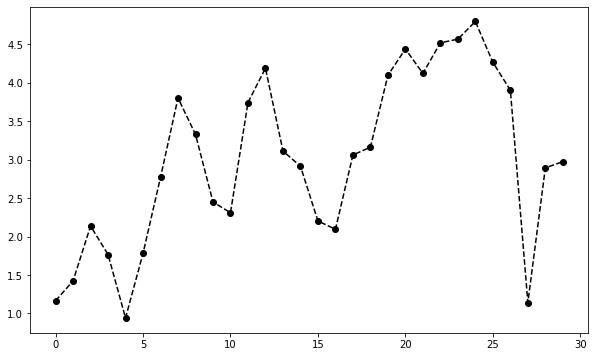

In [17]:
plt.plot(randn(30).cumsum(), 'ko--')

In [18]:
plt.close('all')

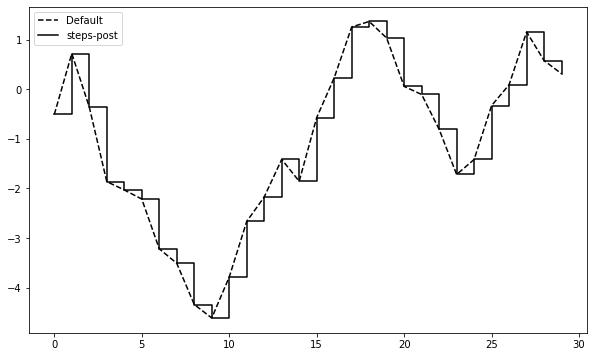

In [20]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

### Ticks, Labels and Legends

#### setting the title, axis Labels, ticks, and ticklabels

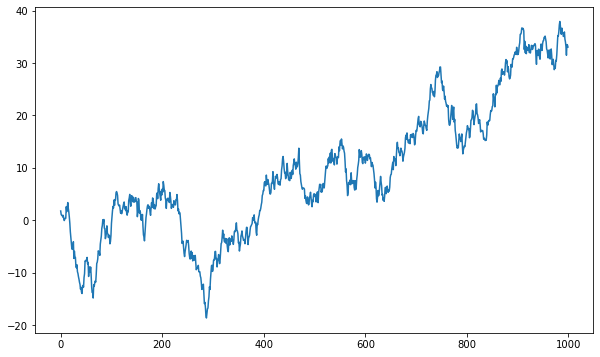

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [23]:
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')

In [24]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.200000000000003, 'Stages')

### Adding legends

In [25]:
from numpy.random import randn

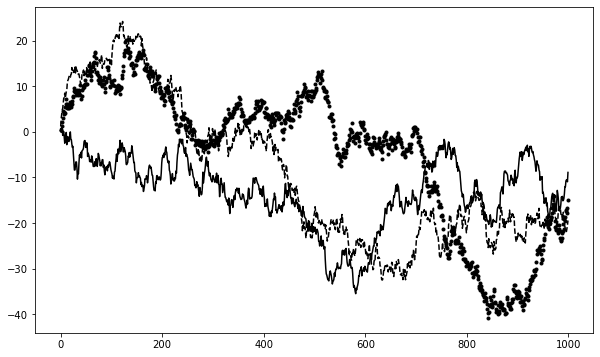

In [26]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')

### Annotations and Drawing on a Subplot

In [27]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

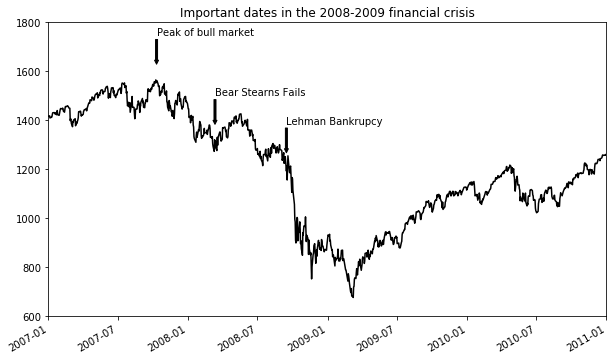

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('./examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007,10,11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankrupcy'),
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
               xytext = (date, spx.asof(date)+225),
               arrowprops = dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# Zoon in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [34]:
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1, 'Important dates in the 2008-2009 financial crisis')

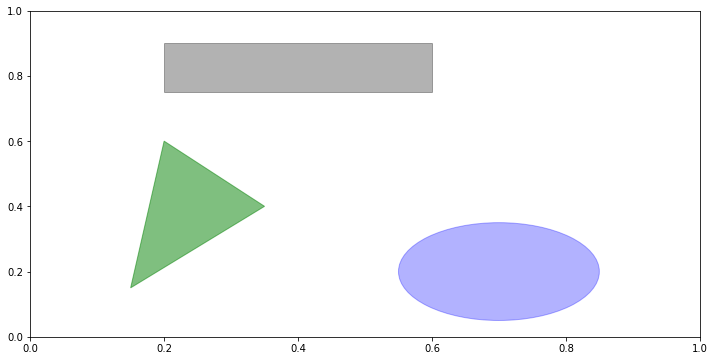

In [36]:
fig = plt.figure(figsize=(12,6)); ax=fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15, color='k', alpha=0.3)
cric = plt.Circle((0.7,0.2),0.15, color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15], [0.35,0.4],[0.2,0.6]],
                  color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(cric)
ax.add_patch(pgon)

### Plotting with pandas ans seaborn

#### Line Plots

In [38]:
plt.close('all')

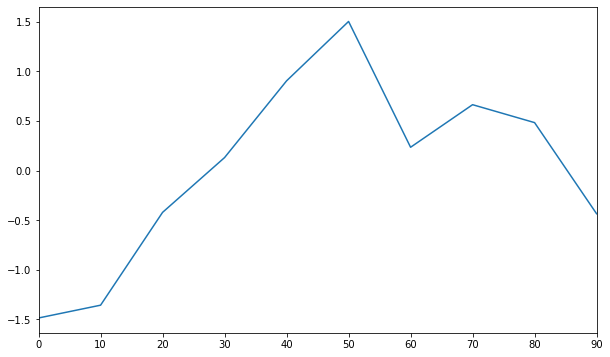

In [41]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

#### Bar Plots

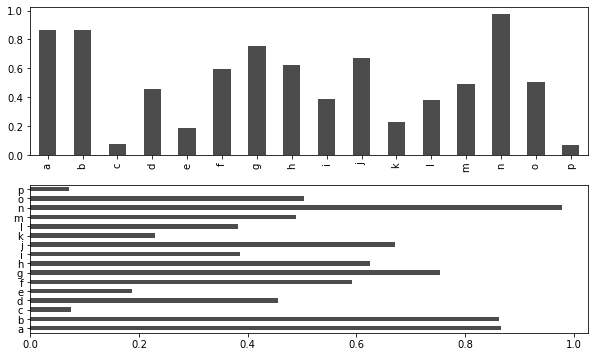

In [44]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k',alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [45]:
np.random.seed(12348)

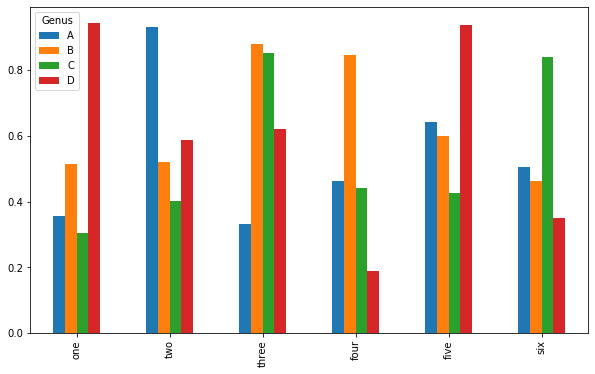

In [47]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns = pd.Index(['A','B','C','D'], name='Genus'))
df
df.plot.bar()

In [48]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

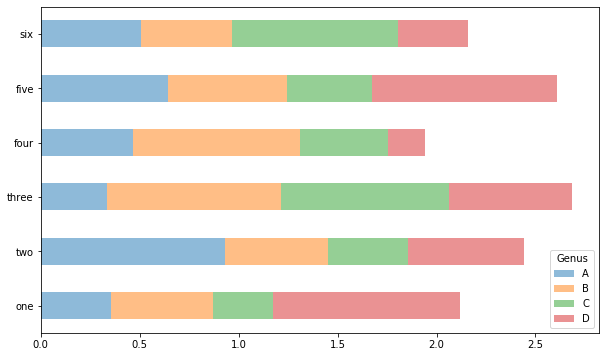

In [49]:
df.plot.barh(stacked=True,alpha=0.5)

In [50]:
plt.close('all')

In [52]:
tips = pd.read_csv('./examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

# Not many 1- and 6-person parties
party_counts = party_counts.loc[:,2:5]

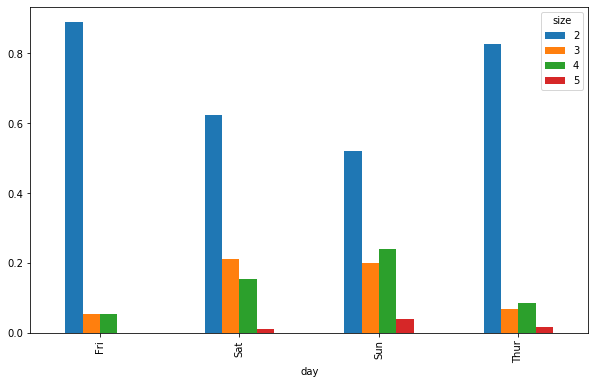

In [55]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [56]:
plt.close('all')

In [57]:
import seaborn as sns

D:\anaconda\envs\chch4934\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\anaconda\envs\chch4934\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\anaconda\envs\chch4934\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


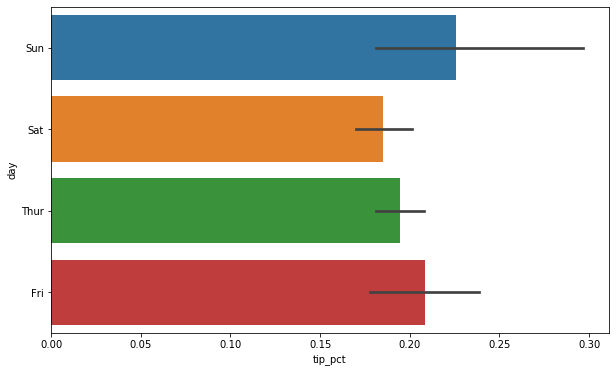

In [60]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill']-tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [61]:
plt.close('all')

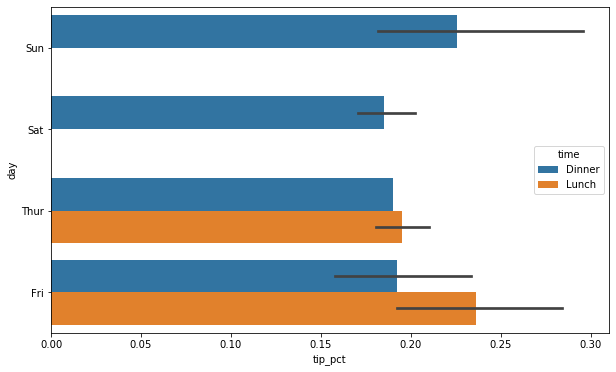

In [62]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [63]:
plt.close('all')

In [64]:
sns.set(style='whitegrid')

### Hostograms and Density Plots

In [65]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

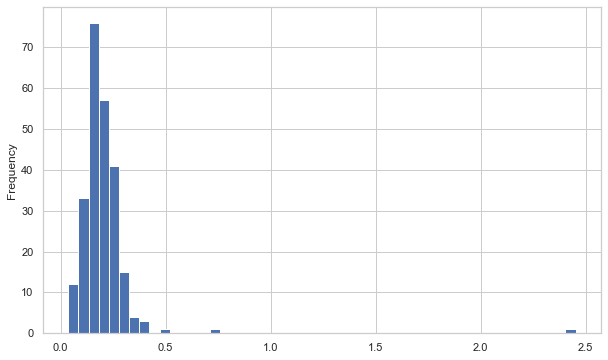

In [66]:
tips['tip_pct'].plot.hist(bins=50)

In [67]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

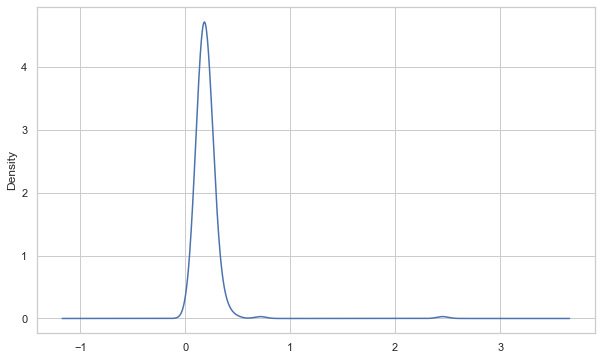

In [68]:
tips['tip_pct'].plot.density()

In [69]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

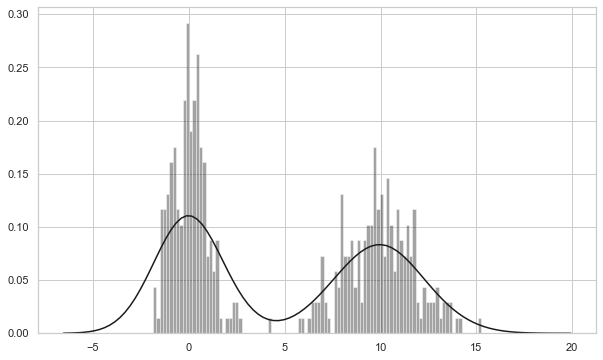

In [71]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### scatter or Point Plots

In [72]:
marco = pd.read_csv('./examples/macrodata.csv')
data = marco[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [74]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

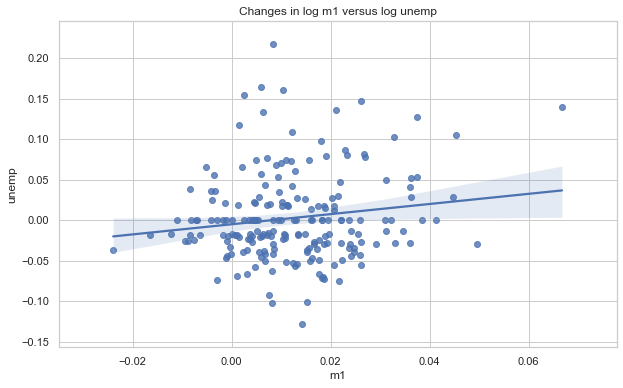

In [75]:
sns.regplot('m1','unemp',data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1','unemp'))

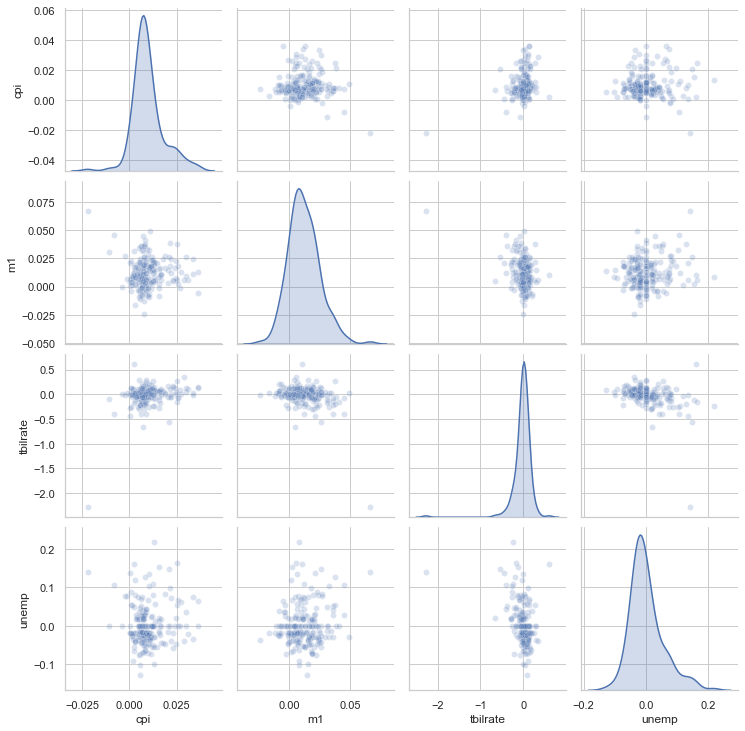

In [78]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

### Facet Grids and Categoricsl Data

D:\anaconda\envs\chch4934\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


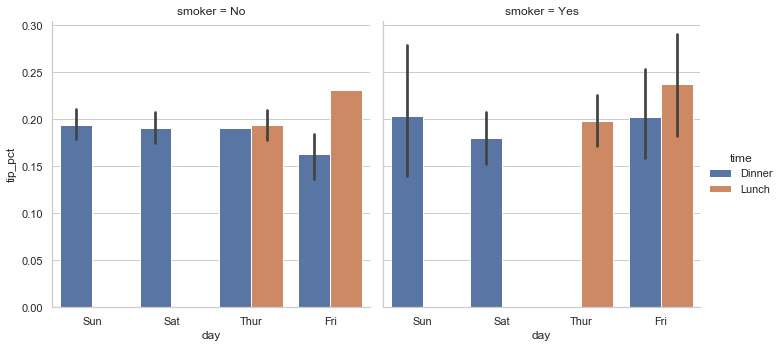

In [79]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct<1])

D:\anaconda\envs\chch4934\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


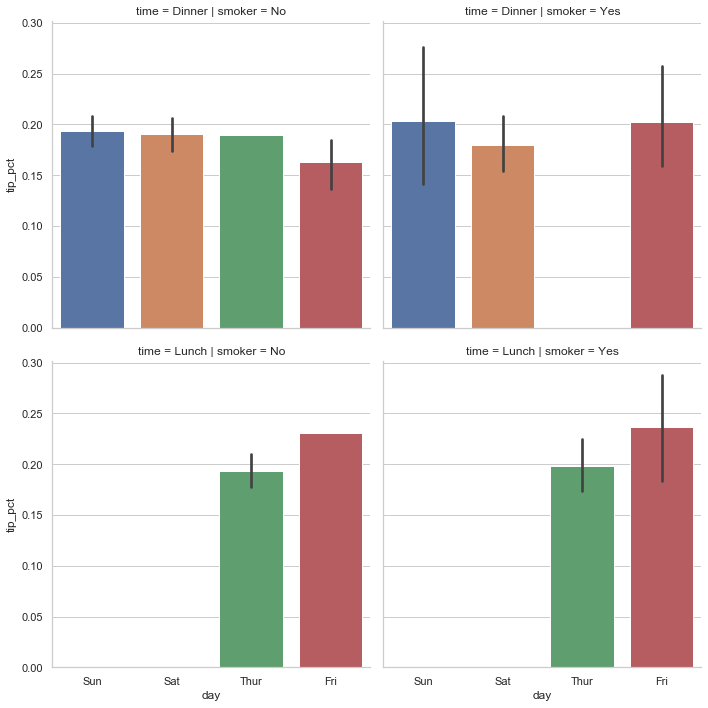

In [81]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct<1])

D:\anaconda\envs\chch4934\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


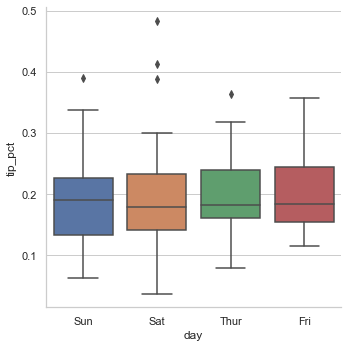

In [82]:
sns.factorplot(x='day', y='tip_pct', kind='box', 
              data=tips[tips.tip_pct<0.5])

### Other Python Visualization Tools

In [83]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS